In [1]:
pip install pandas seaborn matplotlib gradio ollama

  Using cached gradio-5.34.2-py3-none-any.whl.metadata (16 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached fastapi-0.115.13-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.6.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gradio_client-1.10.3-py3-none-any.whl.metadata (7.1 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached huggingface_hub-0.33.0-py3-none-any.whl.metadata (14 kB)
     ---------------------------------------- 0.0/43.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/43.0 kB 259.2 kB/s eta 0:00:01
     -------------------------------------- 43.0/43.0 kB 298.1 kB/s eta 0:00:00
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached ruff

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("C:\\Users\\LAHARI\\Downloads\\titanic_ dataset_final.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
print("\nMissing values:\n",df.isnull().sum())


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


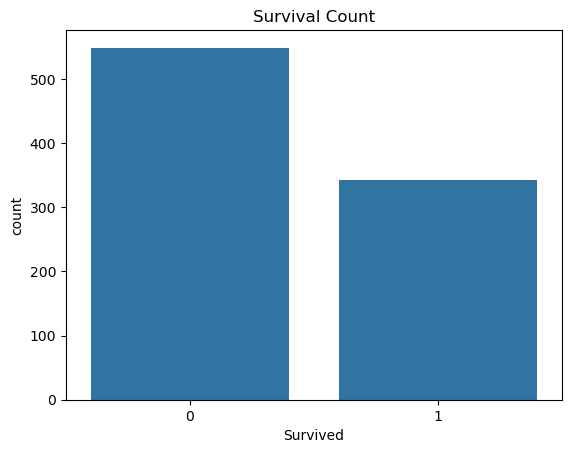

In [13]:
sns.countplot(x='Survived',data=df)
plt.title("Survival Count")
plt.show()

In [15]:
import ollama 

def generate_insights(df_summary):
    prompt=f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response=ollama.chat(model="mistral",messages=[{"role":"user","content":prompt}])
    return response['message']['content']

# Generate AI Insights
summary=df.describe().to_string()
insights=generate_insights(summary)
print("\n AI-Generate Insights:\n",insights)


 AI-Generate Insights:
  The dataset provides a summary of the Titanic passenger data, including variables such as PassengerID, Survived, Pclass, Age, SibSp (number of siblings/spouses aboard the Titanic), Parch (number of parents/children aboard), Fare, and some associated statistics like count (number of observations), mean (average value), standard deviation (variability in the data), minimum and maximum values, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and quartile range (IQR).

From the summary, we can make some observations about the data:

1. The dataset contains 891 observations (passengers) in total.
2. Approximately 61.4% of passengers survived, while the rest did not.
3. The average Pclass is around 2.31, with a standard deviation of 0.84, indicating that most passengers belonged to either the first, second, or third class. However, some passengers were in other classes as well.
4. The mean age of passengers was approximately 29.7 years old

In [16]:
import gradio as gr

def eda_analysis(file):
    df=pd.read_csv(file.name)
    summary=df.describe().to_string()
    insights=generate_insights(summary)
    return insights

#create Web Interface
demo=gr.Interface(fn=eda_analysis,inputs="file",outputs="text",title="AI-Powered EDA with Mistral")

#Launch App
demo.launch(share=True) # Use share=True for Google Colab

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [20]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ollama

# Function to Perform EDA and Generate Visualizations
def eda_analysis(file_path):
    df = pd.read_csv(file_path)
   
    # Fill missing values with median for numeric columns
    for col in df.select_dtypes(include=['number']).columns:
        df[col].fillna(df[col].median(), inplace=True)
   
    # Fill missing values with mode for categorical columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
   
    # Data Summary
    summary = df.describe(include='all').to_string()
   
    # Missing Values
    missing_values = df.isnull().sum().to_string()

    # Generate AI Insights
    insights = generate_ai_insights(summary)
   
    # Generate Data Visualizations
    plot_paths = generate_visualizations(df)
   
    return f"\n Data Loaded Successfully!\n\n Summary:\n{summary}\n\n Missing Values:\n{missing_values}\n\n AI Insights:\n{insights}", plot_paths

# AI-Powered Insights using Mistral-7B (Ollama)
def generate_ai_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Function to Generate Data Visualizations
def generate_visualizations(df):
    plot_paths = []
   
    # Histograms for Numeric Columns
    for col in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], bins=30, kde=True, color="blue")
        plt.title(f"Distribution of {col}")
        path = f"{col}_distribution.png"
        plt.savefig(path)
        plot_paths.append(path)
        plt.close()
   
    # Correlation Heatmap (only numeric columns)
    numeric_df = df.select_dtypes(include=['number'])
    if not numeric_df.empty:
        plt.figure(figsize=(8,5))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap")
        path = "correlation_heatmap.png"
        plt.savefig(path)
        plot_paths.append(path)
        plt.close()

    return plot_paths

# Gradio Interface
demo = gr.Interface(
    fn=eda_analysis,
    inputs=gr.File(type="filepath"),
    outputs=[gr.Textbox(label="EDA Report"), gr.Gallery(label="Data Visualizations")],
    title="📊 LLM-Powered Exploratory Data Analysis (EDA)",
    description="Upload any dataset CSV file and get automated EDA insights with AI-powered analysis and visualizations."
)

# Launch the Gradio App
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Missing file: C:\Users\LAHARI\.cache\huggingface\gradio\frpc\frpc_windows_amd64_v0.3. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.3
3. Move the file to this location: C:\Users\LAHARI\.cache\huggingface\gradio\frpc
